In [9]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def Euclidean(x1, x2):
    return np.sqrt(np.sum((x1- x2)**2))

In [56]:
class KMeans:
    def __init__(self, k= 4, max_iter= 100):
        self.k= k
        self.max_iter= max_iter

        #Keep track of centroids for the clusters
        self.centroids= []

        #Keep track of indices of samples in each clusters
        self.clusters= [[] for _ in range(self.k)]

    def predict(self, X):
        self.X= X
        self.n_sample, self.n_features= X.shape

        init_indices= np.random.choice(self.n_sample, self.k, replace= False)
        self.centroids= [self.X[index] for index in init_indices]

        for _ in range(self.max_iter):
            self.clusters= self._create_clusters(self.centroids)

            centroids_old= self.centroids
            self.centroids= self._get_centroids(self.clusters)

            if self._is_converged(self.centroids, centroids_old):
                break

        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        self.labels= np.empty(self.n_sample)
        for cluster_idx, cluster in enumerate(clusters):
            for idx in cluster:
                self.labels[idx]= cluster_idx
        
        return self.labels


    def _create_clusters(self, centroids):
        clusters= [[] for i in range(self.k)]
        for idx, sample in enumerate(self.X):
            centroid_idx= self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters


    def _closest_centroid(self, sample, centroids):
        return np.argmin([Euclidean(sample, centroids[i]) for i in range(self.k)])

    def _get_centroids(self, clusters):
        centroids= np.zeros((self.k, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean= np.mean(self.X[cluster], axis= 0)
            centroids[cluster_idx]= cluster_mean
        return centroids

    def _is_converged(self, old_centroids, new_centroids):
        distance= [Euclidean(old_centroids[i], new_centroids[i]) for i in range(self.k)]
        return np.sum(distance)== 0

In [11]:
from sklearn.datasets import make_blobs

In [44]:
X, y= make_blobs(centers= 4, n_samples= 500, n_features= 2, shuffle= True, random_state= 42)
print(X.shape)

(500, 2)


In [57]:
kmeans= KMeans()
predicted_class= kmeans.predict(X)

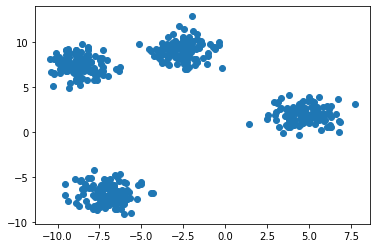

In [64]:
plt.scatter(X[:, 0], X[:, 1])

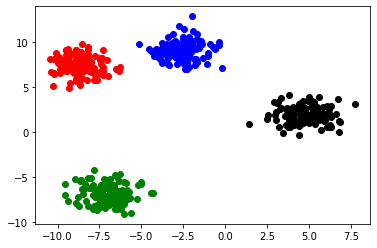

In [62]:
plt.scatter(X[predicted_class== 2][:, 0], X[predicted_class== 2][:, 1], color= 'r')
plt.scatter(X[predicted_class== 1][:, 0], X[predicted_class== 1][:, 1], color= 'k')
plt.scatter(X[predicted_class== 0][:, 0], X[predicted_class== 0][:, 1], color= 'g')
plt.scatter(X[predicted_class== 3][:, 0], X[predicted_class== 3][:, 1], color= 'b')